# Second Analysis

Clusters and topics

Using Spacy and K-Means to analyze the tokens and try to group the contained sentences in each review.

Good tutorials and other texts

- Tutorial: Text Classification in Python Using spaCy
https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

## Importing all needed packages

Command to install **spaCy** package: ***pip install spacy***

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
from tqdm import tqdm 
import time
import seaborn as sns
import re
import random
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.manifold import MDS, TSNE
# from gensim.models import LdaModel, LdaMulticore
# from gensim.corpora import Dictionary
# from gensim.utils import simple_preprocess

## Loading the sentences of the CSV file.

In [2]:
# For time counting
startTime = time.time()

In [3]:
nlp = spacy.load('pt_core_news_lg') # https://spacy.io/models/pt#pt_core_news_lg

In [4]:
df = pd.read_csv( 
    './datasets/sentences.csv',
    encoding = 'UTF8',
    sep = ';');
df.head()

,book_id,review_id,review_rating,sentence
0,8595081530,RM0NBXMBSU4M3,4,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,RM0NBXMBSU4M3,4,Ou daqueles que você termina a leitura sentind...
2,8595081530,RM0NBXMBSU4M3,4,"Você NÃO vai encontrar um setup milagroso, ou ..."
3,8595081530,RM0NBXMBSU4M3,4,Basicamente este livro conta verdades sobre o ...
4,8595081530,RM0NBXMBSU4M3,4,Mostra os detalhes de uma forma tão direta e b...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176751 entries, 0 to 176750
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   book_id        176751 non-null  int64 
 1   review_id      176751 non-null  object
 2   review_rating  176751 non-null  int64 
 3   sentence       176750 non-null  object
dtypes: int64(2), object(2)
memory usage: 5.4+ MB


In [6]:
df.iloc[0]['sentence']

'Sabe todos aqueles livros que ensinam você a criar uma agenda para controle de gastos contendo tudo que você gasta durante determinado período de tempo e que você nunca consegue terminar o tal método?'

In [7]:
doc = nlp( df.iloc[0]['sentence'] )
tokens = [token.text for token in doc]
print(tokens)

['Sabe', 'todos', 'aqueles', 'livros', 'que', 'ensinam', 'você', 'a', 'criar', 'uma', 'agenda', 'para', 'controle', 'de', 'gastos', 'contendo', 'tudo', 'que', 'você', 'gasta', 'durante', 'determinado', 'período', 'de', 'tempo', 'e', 'que', 'você', 'nunca', 'consegue', 'terminar', 'o', 'tal', 'método', '?']


In [8]:
tokens = [token.lemma_ for token in doc]
print(tokens)

['Sabe', 'todo', 'aquele', 'livro', 'que', 'ensinar', 'você', 'o', 'criar', 'umar', 'agendar', 'parir', 'controlo', 'de', 'gasto', 'conter', 'tudo', 'que', 'você', 'gasto', 'durante', 'determinar', 'período', 'de', 'tempo', 'e', 'que', 'você', 'nunca', 'conseguir', 'terminar', 'o', 'tal', 'método', '?']


In [9]:
tokens = [token.pos_ for token in doc]
print(tokens)

['VERB', 'DET', 'DET', 'NOUN', 'PRON', 'VERB', 'PRON', 'SCONJ', 'VERB', 'DET', 'NOUN', 'ADP', 'NOUN', 'ADP', 'NOUN', 'VERB', 'PRON', 'PRON', 'PRON', 'VERB', 'ADP', 'VERB', 'NOUN', 'ADP', 'NOUN', 'CCONJ', 'SCONJ', 'PRON', 'ADV', 'VERB', 'VERB', 'DET', 'DET', 'NOUN', 'PUNCT']


## Analysis of the sentences sizes

In [10]:
df['s_size'] = [ len(str(sentence)) for sentence in df['sentence'] ]
df

,book_id,review_id,review_rating,sentence,s_size
0,8595081530,RM0NBXMBSU4M3,4,Sabe todos aqueles livros que ensinam você a c...,200
1,8595081530,RM0NBXMBSU4M3,4,Ou daqueles que você termina a leitura sentind...,163
2,8595081530,RM0NBXMBSU4M3,4,"Você NÃO vai encontrar um setup milagroso, ou ...",123
3,8595081530,RM0NBXMBSU4M3,4,Basicamente este livro conta verdades sobre o ...,55
4,8595081530,RM0NBXMBSU4M3,4,Mostra os detalhes de uma forma tão direta e b...,225
...,...,...,...,...,...
176746,8544106595,RQUIEDP9RU8GN,5,"Uma obra que toca nos seus maiores pesadelos,m...",302
176747,8544106595,R28THF88K7GE5S,5,"Leve,pesado,forte,suave,lindo,feio e todas as ...",59
176748,8544106595,R28THF88K7GE5S,5,"Lindo,lindo,lindo.",18
176749,8544106595,R28THF88K7GE5S,5,"Amei,comi,bebi cada palavra.",28


In [11]:
df['s_size'].describe()

count    176751.000000
mean         68.294205
std          62.576959
min           1.000000
25%          25.000000
50%          52.000000
75%          93.000000
max        2080.000000
Name: s_size, dtype: float64

## Analysis of top sentences

In [12]:
df['sentence'].value_counts()

                                                                                1116
Muito bom                                                                        584
Recomendo.                                                                       561
!                                                                                514
Muito bom!                                                                       459
                                                                                ... 
Muito bom, fácil a leitura e bem diferente dos filmes hehehehe                     1
O Senhor do anéis completo.                                                        1
Gostei tanto que comprei em seguida o box                                          1
História muito cativante e divertida de se ler.                                    1
A poesia de  Amanda  é visceral ,intensa e tão próxima de todas as mulheres.       1
Name: sentence, Length: 138605, dtype: int64

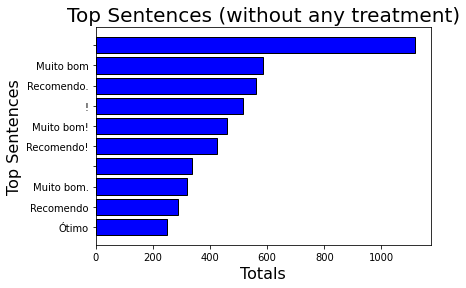

In [13]:
topSentencesLimit = 10
topSentences = df['sentence'].value_counts().index[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
pos = np.arange( topSentencesLimit )
sentenceTotals = df['sentence'].value_counts().values[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
 
plt.barh(
    pos,
    sentenceTotals,
    color='blue',
    edgecolor='black')
plt.yticks( pos, topSentences )
plt.xlabel( 'Totals', fontsize=16 )
plt.ylabel( 'Top Sentences', fontsize=16 )
plt.title( 'Top Sentences (without any treatment)', fontsize=20 )
plt.show()

### Function: cleanSentence()

In [14]:
tokensToClear = '\: \, \. \! \? \% \' \( \) \, \- \_ \“ \” \● \♥ \d \/ \$ \& \` \* \+ \❞ \° \– \…'
tokensToClear += ' 👏 💪 📸 😁 😍 😘 😚 🙂 🥰 🥺 ❤ 🏻 🏾 💃 💖 😉 😔 😲 ✨ 💗 💚 🔝 😊 😕 😻 🧐 🤧'
tokensToClear += ' um uma uns umas o a os as' 
tokensToClear += ' de do da des dos das em no na nos nas' 
tokensToClear += ' livro livros leitura' 
tokensToClear += ' muito eu mas mais pessoas' 
tokensToClear += ' como se tudo mesmo me sobre' 
tokensToClear += ' quem por todos e é seu eu minha meu' 
tokensToClear += ' ler esse essa esses essas cada isso' 
tokensToClear += ' eu tu ele nós vós eles' 
tokensToClear += ' que com ao tem pela muito para' 
tokensToClear += ' foi ter sua ser pra você super já são ou estou só até'
tokensToClear += ' bem bom'
tokensToClear += ' melhor ainda algum achar'
tokensToClear += ' ler nosso este pouco ser estar ficar tão deixar porém também comprar outro coisa ter'

def cleanSentence( sentence ):
    
    sentence = str( sentence )
    sentence = sentence.lower()
    
    for token in tokensToClear.split():
        
        sentence = re.sub('^' + token + '\s', ' ', sentence) # at begining of the sentence
        sentence = re.sub('\s' + token + '$', ' ', sentence) # at ending of the sentence
        sentence = re.sub('\s' + token + '\s', ' ', sentence) # in the middle of the sentence
        
    sentence = re.sub('\,', '', sentence)
    sentence = re.sub('\.', '', sentence)
    sentence = re.sub('\)', '', sentence)
    sentence = re.sub('\(', '', sentence)
    sentence = re.sub('\!', '', sentence)

    sentence = re.sub('\s\s', ' ', sentence)
    sentence = re.sub('^\s', ' ', sentence)
    sentence = re.sub('\s$', ' ', sentence)
    
    sentence = sentence.strip()
        
    return sentence

In [15]:
df.head()

,book_id,review_id,review_rating,sentence,s_size
0,8595081530,RM0NBXMBSU4M3,4,Sabe todos aqueles livros que ensinam você a c...,200
1,8595081530,RM0NBXMBSU4M3,4,Ou daqueles que você termina a leitura sentind...,163
2,8595081530,RM0NBXMBSU4M3,4,"Você NÃO vai encontrar um setup milagroso, ou ...",123
3,8595081530,RM0NBXMBSU4M3,4,Basicamente este livro conta verdades sobre o ...,55
4,8595081530,RM0NBXMBSU4M3,4,Mostra os detalhes de uma forma tão direta e b...,225


### Get top sentences

In [16]:
%%time

dfTopSentences = df.copy()
dfTopSentences['sentence'] = df['sentence'].apply( lambda sentence: cleanSentence(sentence))
dfTopSentences.head()

CPU times: user 1min 42s, sys: 139 ms, total: 1min 42s
Wall time: 1min 42s


,book_id,review_id,review_rating,sentence,s_size
0,8595081530,RM0NBXMBSU4M3,4,sabe aqueles ensinam criar agenda controle gas...,200
1,8595081530,RM0NBXMBSU4M3,4,daqueles termina sentindo vida vai mudar quand...,163
2,8595081530,RM0NBXMBSU4M3,4,não vai encontrar setup milagroso tipo mindset...,123
3,8595081530,RM0NBXMBSU4M3,4,basicamente conta verdades dinheiro,55
4,8595081530,RM0NBXMBSU4M3,4,mostra detalhes forma direta escrita acaba per...,225


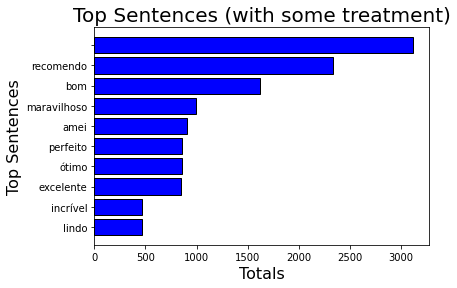

In [17]:
topSentencesLimit = 10
topSentences = dfTopSentences['sentence'].value_counts().index[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
pos = np.arange( topSentencesLimit )
sentenceTotals = dfTopSentences['sentence'].value_counts().values[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
 
plt.barh(
    pos,
    sentenceTotals,
    color='blue',
    edgecolor='black')
plt.yticks( pos, topSentences )
plt.xlabel( 'Totals', fontsize=16 )
plt.ylabel( 'Top Sentences', fontsize=16 )
plt.title( 'Top Sentences (with some treatment)', fontsize=20 )
plt.show()

### Repeated Sentences

In [18]:
total = len(dfTopSentences['sentence'])
values = dfTopSentences['sentence'].value_counts()[:total]
sentences = dfTopSentences['sentence'].value_counts()[:total].index

In [19]:
repeatedSentences = list()
for i in range(0, len(sentences)):
    # print( f'{sentence[i]} - {values[i]}' )
    if values[i] > 1:
        repeatedSentences.append( {
            'sentence': sentences[i],
            'value': values[i],
        } )

print( f'Total of results: { len(repeatedSentences) }' )
print( '--------------------------' )
print()

showTotal = 10
print( f'First {showTotal} results' )
print( '--------------------------' )
print()
for item in repeatedSentences[:showTotal]:
        
    print( f"{item['sentence']} - {item['value']}" )

print()
print( '===================================================' )
print()
    
print( f'Last {showTotal} results' )
print( '--------------------------' )
print()
for item in repeatedSentences[-showTotal:]:
        
    print( f"{item['sentence']} - {item['value']}" )

Total of results: 11333
--------------------------

First 10 results
--------------------------

 - 3124
recomendo - 2340
bom - 1624
maravilhoso - 998
amei - 909
perfeito - 855
ótimo - 855
excelente - 845
incrível - 465
lindo - 462


Last 10 results
--------------------------

não leria novamente - 2
livro júlia quinn surpreende - 2
julia quinn escritora incrível não diferente nesse livro - 2
história divertida romance óbvio sempre surpresas caminho seja própria história personagens si - 2
edição caprichada editora arqueiro - 2
sastifesta - 2
correspondeu minhas expectativasum lindo ótimos diálogos cenas engraçadíssimas - 2
❤️ não rasura nem página apagada - 2
mãe havia dado outros faltou este aí comprei amazon maior outros assim lindo - 2
família incrível amorosa toda cheia conflitos assim unidos - 2


### Unique Sentences

In [20]:
uniqueSentences = list()
for i in range(0, len(sentences)):
    
    if values[i] == 1:
        uniqueSentences.append( {
            'sentence': sentences[i],
            'value': values[i],
        } )

print( f'Total of results: { len(uniqueSentences) }' )
print( '--------------------------' )
print()

showTotal = 10
print( f'First {showTotal} results' )
print( '--------------------------' )
print()
for item in uniqueSentences[:showTotal]:
        
    print( f">>> {item['sentence']} - {item['value']}" )

print()
print( '===================================================' )
print()
    
print( f'Last {showTotal} results' )
print( '--------------------------' )
print()
for item in uniqueSentences[-showTotal:]:
        
    print( f">>> {item['sentence']} - {item['value']}" )

Total of results: 115180
--------------------------

First 10 results
--------------------------

>>> harry certeza ganhou coração hermione bruxinha favorita rony ruivo legal engraçado - 1
>>> queria chegou beeem antes prazo acabamento colagem perfeitaobrigada prestatividade - 1
>>> chamariz novos leitores descanso leitores assíduos - 1
>>> bom história conhecia filme incrível - 1
>>> perfeito n chegou defeitos algumperfeito - 1
>>> bonito cheio detalhes bacanas ótimo acabamento páginas - 1
>>> perfeito chegou semana muito antes prazo bonito - 1
>>> entregue perfeitamente filha gostou mto - 1
>>> recebi rápido valeu pena centavo pago nessa edição maravilhosa - 1
>>> amei capa formato edição ótima - 1


Last 10 results
--------------------------

>>> algumas ilustrações história incrível - 1
>>> obrigatória fãs tolkien - 1
>>> entrega rápida produto embalado realmente vem pôster - 1
>>> puro simples - 1
>>> escrito estruturado cativante - 1
>>> acabado pôster ótima qualidade - 1
>>> che

### A good question to future investigation:

We can relate these top sentences with users? Maybe the top sentences belongs to the same group of people...**

But we need to observe privacy before this...**

## Preparing the analysis dataframe

### Get only unique sentences to analyse

In [21]:
tempDf = df.copy()

In [22]:
%%time

tempDf['cleaned_sentence'] = [cleanSentence(sentence) for sentence in df['sentence']]

CPU times: user 1min 40s, sys: 136 ms, total: 1min 40s
Wall time: 1min 40s


In [23]:
tempDf['c_s_size'] = [ len(str(sentence)) for sentence in tempDf['cleaned_sentence'] ]
tempDf

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size
0,8595081530,RM0NBXMBSU4M3,4,Sabe todos aqueles livros que ensinam você a c...,200,sabe aqueles ensinam criar agenda controle gas...,134
1,8595081530,RM0NBXMBSU4M3,4,Ou daqueles que você termina a leitura sentind...,163,daqueles termina sentindo vida vai mudar quand...,110
2,8595081530,RM0NBXMBSU4M3,4,"Você NÃO vai encontrar um setup milagroso, ou ...",123,não vai encontrar setup milagroso tipo mindset...,86
3,8595081530,RM0NBXMBSU4M3,4,Basicamente este livro conta verdades sobre o ...,55,basicamente conta verdades dinheiro,35
4,8595081530,RM0NBXMBSU4M3,4,Mostra os detalhes de uma forma tão direta e b...,225,mostra detalhes forma direta escrita acaba per...,178
...,...,...,...,...,...,...,...
176746,8544106595,RQUIEDP9RU8GN,5,"Uma obra que toca nos seus maiores pesadelos,m...",302,obra toca seus maiores pesadelosmas apesar mos...,225
176747,8544106595,R28THF88K7GE5S,5,"Leve,pesado,forte,suave,lindo,feio e todas as ...",59,levepesadofortesuavelindofeio todas fases lua,45
176748,8544106595,R28THF88K7GE5S,5,"Lindo,lindo,lindo.",18,lindolindolindo,15
176749,8544106595,R28THF88K7GE5S,5,"Amei,comi,bebi cada palavra.",28,ameicomibebi palavra,20


#### Total of sentences

In [24]:
len(tempDf)

176751

### Get the sentence words count

In [25]:
tempDf['c_s_words_count'] = tempDf.apply( lambda row: len( str(row['sentence']).split() ), axis = 1)
tempDf.head()

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count
0,8595081530,RM0NBXMBSU4M3,4,Sabe todos aqueles livros que ensinam você a c...,200,sabe aqueles ensinam criar agenda controle gas...,134,34
1,8595081530,RM0NBXMBSU4M3,4,Ou daqueles que você termina a leitura sentind...,163,daqueles termina sentindo vida vai mudar quand...,110,26
2,8595081530,RM0NBXMBSU4M3,4,"Você NÃO vai encontrar um setup milagroso, ou ...",123,não vai encontrar setup milagroso tipo mindset...,86,23
3,8595081530,RM0NBXMBSU4M3,4,Basicamente este livro conta verdades sobre o ...,55,basicamente conta verdades dinheiro,35,8
4,8595081530,RM0NBXMBSU4M3,4,Mostra os detalhes de uma forma tão direta e b...,225,mostra detalhes forma direta escrita acaba per...,178,36


### Sentences with fewer than the minimum number of words

In [26]:
tempDf[ tempDf[ 'c_s_words_count' ] < 5 ].head()

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count
6,8595081530,RM0NBXMBSU4M3,4,Ps.:,4,ps:,3,1
8,8595081530,RM0NBXMBSU4M3,4,Recomendo muito!,16,recomendo muito,15,2
18,8595081530,R3KC0ZLPQX85LT,5,Controle os seus gastos.,24,controle seus gastos,20,4
22,8595081530,R3KC0ZLPQX85LT,5,Multiplique o seu dinheiro.,27,multiplique dinheiro,20,4
30,8595081530,R3KC0ZLPQX85LT,5,Não seja um procrastinador.,27,não seja procrastinador,23,4


In [27]:
len( tempDf[ tempDf[ 'c_s_words_count' ] < 5 ] )

47945

### Filtering sentences with more than the minimum number of words

In [28]:
minWordCount = 5

tempDf['keep'] = tempDf.apply(lambda row: row['c_s_words_count'] > minWordCount, axis = 1)
tempDf.head()

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,keep
0,8595081530,RM0NBXMBSU4M3,4,Sabe todos aqueles livros que ensinam você a c...,200,sabe aqueles ensinam criar agenda controle gas...,134,34,True
1,8595081530,RM0NBXMBSU4M3,4,Ou daqueles que você termina a leitura sentind...,163,daqueles termina sentindo vida vai mudar quand...,110,26,True
2,8595081530,RM0NBXMBSU4M3,4,"Você NÃO vai encontrar um setup milagroso, ou ...",123,não vai encontrar setup milagroso tipo mindset...,86,23,True
3,8595081530,RM0NBXMBSU4M3,4,Basicamente este livro conta verdades sobre o ...,55,basicamente conta verdades dinheiro,35,8,True
4,8595081530,RM0NBXMBSU4M3,4,Mostra os detalhes de uma forma tão direta e b...,225,mostra detalhes forma direta escrita acaba per...,178,36,True


In [29]:
tempDf.drop( 
    tempDf[ tempDf['keep'] == False ].index, 
    inplace = True )

In [30]:
tempDf.head()

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,keep
0,8595081530,RM0NBXMBSU4M3,4,Sabe todos aqueles livros que ensinam você a c...,200,sabe aqueles ensinam criar agenda controle gas...,134,34,True
1,8595081530,RM0NBXMBSU4M3,4,Ou daqueles que você termina a leitura sentind...,163,daqueles termina sentindo vida vai mudar quand...,110,26,True
2,8595081530,RM0NBXMBSU4M3,4,"Você NÃO vai encontrar um setup milagroso, ou ...",123,não vai encontrar setup milagroso tipo mindset...,86,23,True
3,8595081530,RM0NBXMBSU4M3,4,Basicamente este livro conta verdades sobre o ...,55,basicamente conta verdades dinheiro,35,8,True
4,8595081530,RM0NBXMBSU4M3,4,Mostra os detalhes de uma forma tão direta e b...,225,mostra detalhes forma direta escrita acaba per...,178,36,True


#### Total of sentences (after filter sentences with less than minimum number of words)

In [31]:
len( tempDf )

119272

#### Remove column *keep*

In [32]:
tempDf.drop(
    'keep', 
    axis = 1, 
    inplace = True)
tempDf.head()

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count
0,8595081530,RM0NBXMBSU4M3,4,Sabe todos aqueles livros que ensinam você a c...,200,sabe aqueles ensinam criar agenda controle gas...,134,34
1,8595081530,RM0NBXMBSU4M3,4,Ou daqueles que você termina a leitura sentind...,163,daqueles termina sentindo vida vai mudar quand...,110,26
2,8595081530,RM0NBXMBSU4M3,4,"Você NÃO vai encontrar um setup milagroso, ou ...",123,não vai encontrar setup milagroso tipo mindset...,86,23
3,8595081530,RM0NBXMBSU4M3,4,Basicamente este livro conta verdades sobre o ...,55,basicamente conta verdades dinheiro,35,8
4,8595081530,RM0NBXMBSU4M3,4,Mostra os detalhes de uma forma tão direta e b...,225,mostra detalhes forma direta escrita acaba per...,178,36


### Get unique sentences

In [33]:
uniqueSentencesList = [ item['sentence'] for item in uniqueSentences ]
# uniqueSentencesList

In [34]:
tempDf = tempDf[ tempDf[ 'cleaned_sentence' ].isin(uniqueSentencesList) ]

#### Total of sentences (unique)

In [35]:
len(tempDf)

99084

In [36]:
tempDf

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count
0,8595081530,RM0NBXMBSU4M3,4,Sabe todos aqueles livros que ensinam você a c...,200,sabe aqueles ensinam criar agenda controle gas...,134,34
1,8595081530,RM0NBXMBSU4M3,4,Ou daqueles que você termina a leitura sentind...,163,daqueles termina sentindo vida vai mudar quand...,110,26
2,8595081530,RM0NBXMBSU4M3,4,"Você NÃO vai encontrar um setup milagroso, ou ...",123,não vai encontrar setup milagroso tipo mindset...,86,23
3,8595081530,RM0NBXMBSU4M3,4,Basicamente este livro conta verdades sobre o ...,55,basicamente conta verdades dinheiro,35,8
4,8595081530,RM0NBXMBSU4M3,4,Mostra os detalhes de uma forma tão direta e b...,225,mostra detalhes forma direta escrita acaba per...,178,36
...,...,...,...,...,...,...,...,...
176744,8544106595,R2QICSES0F3VIR,5,Admito que fiquei com medo de o livro estragar...,144,admito fiquei medo estragar durante percurso t...,107,23
176745,8544106595,R2QICSES0F3VIR,5,"Amazon me surpreendeu muito, comprarei de novo",46,amazon surpreendeu muito comprarei novo,39,7
176746,8544106595,RQUIEDP9RU8GN,5,"Uma obra que toca nos seus maiores pesadelos,m...",302,obra toca seus maiores pesadelosmas apesar mos...,225,53
176747,8544106595,R28THF88K7GE5S,5,"Leve,pesado,forte,suave,lindo,feio e todas as ...",59,levepesadofortesuavelindofeio todas fases lua,45,7


### Total of sentences (sample)

In [37]:
sampleTotal = 50000

In [38]:
# analysisDf = tempDf.iloc[ :sampleTotal ]
analysisDf = tempDf.sample( sampleTotal )

In [39]:
analysisDf.head()

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count
74122,6555111100,R1QTOBLPDAIKUZ,5,Tenha um espaço para isso e mantenha a mentali...,83,tenha espaço mantenha mentalidade suficiente t...,55,15
111250,8542209826,R29XA7OPEN44C2,2,Com 8 anos eu tinha nojo dessas coisas.,39,anos tinha nojo dessas coisas,29,8
744,8595081530,R2FY1LR4C93HEE,5,Cada página há um aprendizado para levar para ...,58,página há aprendizado levar vida toda,37,11
6025,8501112518,R37NL3KXLX8RZE,5,Ler este livro é embarca em uma aventura emoci...,100,embarca aventura emocionante personagens incri...,66,14
35955,8547000240,R1EFTRLCD6YDN2,4,Quanto ao livro poderia ter sido mais objetivo...,64,quanto poderia sido objetivo menos prolixo,42,10


In [40]:
analysisDf.tail()

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count
118319,8532530788,R3OLWVKCIMHZ6Z,5,"Livro chegou em perfeito estado, e não tem nem...",93,chegou perfeito estado não nem oq falar histór...,73,15
162566,8532649963,R3MAQKA4JA7TNY,5,"muito bom, chegou em dois dias",30,bom chegou dois dias,20,6
48721,8539004119,R96MG8I0EDIKY,4,Bem fácil de entender quando os métodos descri...,92,fácil entender quando métodos descritos associ...,72,14
155081,8545202210,R3PSK669391CCI,5,"Paulo Vieira é otimo,me acrescenta muito.",41,paulo vieira otimome acrescenta muito,37,6
154656,8545202210,R1PJQGCM3JAMYQ,5,Paulo Vieira nos brinda com uma abordagem obje...,175,paulo vieira brinda abordagem objetiva didátic...,143,25


In [41]:
analysisDf.shape

(50000, 8)

### Analysis of the sentences sizes

In [42]:
df['s_size'].describe()

count    176751.000000
mean         68.294205
std          62.576959
min           1.000000
25%          25.000000
50%          52.000000
75%          93.000000
max        2080.000000
Name: s_size, dtype: float64

In [43]:
analysisDf['c_s_size'].describe()

count    50000.000000
mean        66.168820
std         45.593583
min          2.000000
25%         36.000000
50%         54.000000
75%         82.000000
max        850.000000
Name: c_s_size, dtype: float64

### Disable warnings

In [44]:
import warnings
warnings.filterwarnings("ignore")

### Function: tokenizer()

In [45]:
def tokenizer( sentence ):
    
    doc = nlp( sentence )
    # tokens = [token.lemma_ for token in doc]
    tokens = [token.text for token in doc]
    
    return tokens

### max_df and min_df

In [46]:
# max_df = .97
# min_df = .03

max_df = .98
min_df = .02

# max_df = 1
# min_df = 0

## Building a Bag of Words (BoW) with the words of the sentences.

### BoW - Token Frequency

In [47]:
%%time

vectorizer = CountVectorizer(
    tokenizer = tokenizer,
    ngram_range = (1,1),
    max_df = max_df,
    min_df = min_df)

dfBowTokenFrequency = pd.DataFrame(
    data = vectorizer.fit_transform( analysisDf['cleaned_sentence'] ).toarray(),
    columns = vectorizer.get_feature_names())
dfBowTokenFrequency.head(20)

CPU times: user 3min 54s, sys: 212 ms, total: 3min 54s
Wall time: 3min 54s


,:,amei,antes,autor,autora,capa,chegou,ela,entrega,está,...,quando,recomendo,sem,sempre,te,tempo,vai,veio,vida,ótimo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [48]:
print( f'Number of columns: {len( dfBowTokenFrequency.columns)}' )

Number of columns: 34


In [49]:
# for item in dfBowTokenFrequency.columns:
#     print(item)

#### WordCloud

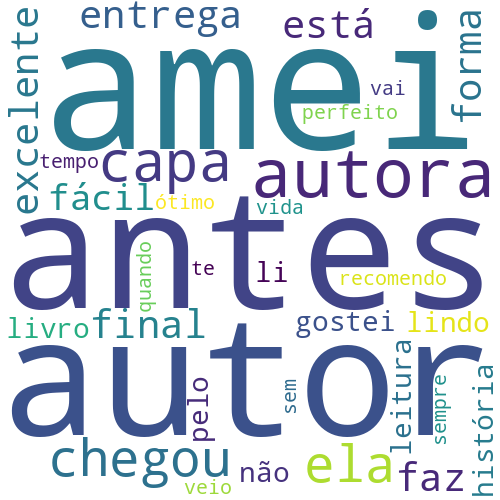

In [50]:
wordsBowTokenFrequency = ','.join( list(dfBowTokenFrequency.columns) )
wordcloud = WordCloud(
    background_color="white", 
    contour_width=3, 
    contour_color='steelblue',
    width=500,
    height=500)
wordcloud.generate( wordsBowTokenFrequency )
wordcloud.to_image()

### BoW - Sparse Matrix - Binary

In [51]:
%%time

vectorizer = CountVectorizer(
    tokenizer=tokenizer,
    ngram_range=(1,1),
    binary=True,
    max_df = max_df,
    min_df = min_df)

dfBowBinary = pd.DataFrame(
    data = vectorizer.fit_transform( analysisDf['cleaned_sentence'] ).toarray(),
    columns = vectorizer.get_feature_names())
dfBowBinary.head(20)

CPU times: user 3min 52s, sys: 99.9 ms, total: 3min 52s
Wall time: 3min 52s


,:,amei,antes,autor,autora,capa,chegou,ela,entrega,está,...,quando,recomendo,sem,sempre,te,tempo,vai,veio,vida,ótimo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [52]:
print( f'Number of columns: {len( dfBowBinary.columns)}' )

Number of columns: 34


#### WordCloud

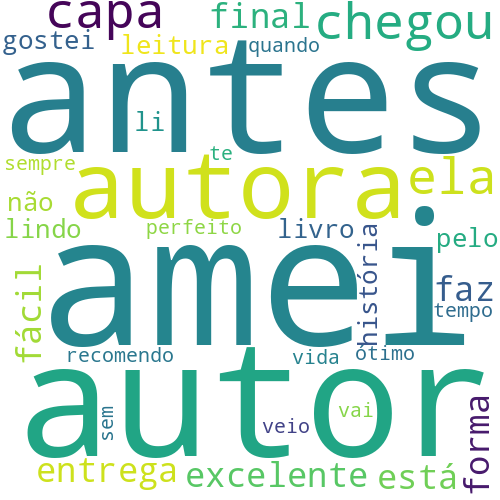

In [53]:
wordsBowBinary = ','.join( list(dfBowBinary.columns) )
wordcloud = WordCloud(
    background_color="white", 
    contour_width=3, 
    contour_color='steelblue',
    width=500,
    height=500)
wordcloud.generate( wordsBowBinary )
wordcloud.to_image()

### BoW - TF-IDF

https://www.kaggle.com/code/k4puneet/countvectorizer-tfidf-tutorial/notebook

#### TfidfVectorizer

In [54]:
%%time

vectorizer = TfidfVectorizer( 
    analyzer = tokenizer,
    max_df = max_df,
    min_df = min_df)

dfBowTFIDF = pd.DataFrame(
    data = vectorizer.fit_transform( analysisDf['cleaned_sentence'] ).toarray(),
    columns = vectorizer.get_feature_names())
dfBowTFIDF.head(20)

CPU times: user 3min 51s, sys: 168 ms, total: 3min 52s
Wall time: 3min 52s


,:,amei,antes,autor,autora,capa,chegou,ela,entrega,está,...,quando,recomendo,sem,sempre,te,tempo,vai,veio,vida,ótimo
0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0
3,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
5,0.0000,0.0,0.0,0.0,0.0,0.0,0.661876,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
6,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0
7,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
8,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
9,0.6162,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.61553,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.491345,0.0


In [55]:
print( f'Number of columns: {len( dfBowTFIDF.columns )}' )

Number of columns: 34


#### WordCloud

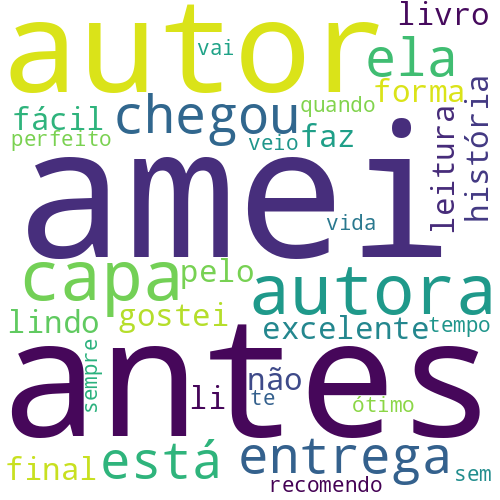

In [56]:
wordsBowTFIDF = ','.join( list(dfBowTFIDF.columns) )
wordcloud = WordCloud(
    background_color="white", 
    contour_width=3, 
    contour_color='steelblue',
    width=500,
    height=500)
wordcloud.generate( wordsBowTFIDF )
wordcloud.to_image()

### Total of clusters

In [57]:
clustersTotal = 5

### Function: classReport()

In [58]:
def classReport( columnLabel, clustersTotal ):

    for i in range(0, clustersTotal):

        print( '===========================================================================' )
        print( f'Representation: {columnLabel} - class: {i}' )
        print( '===========================================================================' )
        print()

        dfClass = analysisDf[ analysisDf[ columnLabel ] == i ]

        display( dfClass.head(10) )
        print()

        print( f'Sentences by score from class {i}' )
        print( '====================================' )
        print( dfClass[ 'review_rating' ].value_counts().sort_index( ascending=False ) )
        print()

        print( f'Examples from class {i}' )
        print( '====================================' )
        print()

        if len( dfClass['sentence'] ) >= 5:
            sentencesClass = dfClass['sentence'].sample(5)
            for sentence in sentencesClass:
                print( sentence )
                print()
                print( '---------------------------------------------------------------------------------------------------------' )
                print()
        else:
            for sentence in dfClass['sentence']:
                print( sentence )
                print()
                print( '---------------------------------------------------------------------------------------------------------' )
                print()
                

        print( '######################################################################################################################################################' )
        print( '######################################################################################################################################################' )
        print( '######################################################################################################################################################' )
        print()

### K-Means - BoW - Token Frequency

In [59]:
kmeans = KMeans(n_clusters=clustersTotal, random_state=0).fit( dfBowTokenFrequency )
kmeans

KMeans(n_clusters=5, random_state=0)

#### Labels and Centroids

In [60]:
# kmeans.labels_

In [61]:
# kmeans.cluster_centers_

In [62]:
columnLabel = 'class_kmeans_bow_token_frequency'

In [63]:
analysisDf[columnLabel] = kmeans.labels_
analysisDf.head()

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,class_kmeans_bow_token_frequency
74122,6555111100,R1QTOBLPDAIKUZ,5,Tenha um espaço para isso e mantenha a mentali...,83,tenha espaço mantenha mentalidade suficiente t...,55,15,3
111250,8542209826,R29XA7OPEN44C2,2,Com 8 anos eu tinha nojo dessas coisas.,39,anos tinha nojo dessas coisas,29,8,3
744,8595081530,R2FY1LR4C93HEE,5,Cada página há um aprendizado para levar para ...,58,página há aprendizado levar vida toda,37,11,4
6025,8501112518,R37NL3KXLX8RZE,5,Ler este livro é embarca em uma aventura emoci...,100,embarca aventura emocionante personagens incri...,66,14,3
35955,8547000240,R1EFTRLCD6YDN2,4,Quanto ao livro poderia ter sido mais objetivo...,64,quanto poderia sido objetivo menos prolixo,42,10,3


In [64]:
analysisDf[columnLabel].value_counts().sort_index()

0     7810
1     2055
2     2857
3    34401
4     2877
Name: class_kmeans_bow_token_frequency, dtype: int64

#### PCA

In [65]:
# %%time

# pcaBowTokenFrequency = PCA( n_components=2 )
# principalComponentsBowTokenFrequency = pcaBowTokenFrequency.fit_transform( dfBowTokenFrequency )

In [66]:
# a = []
# b = []
# for item in principalComponentsBowTokenFrequency:
#     # print(item[0])
#     a.append( item[0] )
#     b.append( item[1] )

In [67]:
# sns.scatterplot(
#     x = a, 
#     y = b,
#     hue = kmeans.labels_,
#     palette = 'viridis')

#### MDS

In [68]:
# %%time

# mds = MDS(n_components=2)
# mds = mds.fit_transform( dfBowTokenFrequency )
# mds.shape

In [69]:
# a = []
# b = []
# for item in mds:
#     # print(item[0])
#     a.append( item[0] )
#     b.append( item[1] )

In [70]:
# sns.scatterplot(
#     x = a, 
#     y = b,
#     hue = kmeans.labels_,
#     palette = 'viridis')

#### TSNE

In [71]:
%%time

tsne = TSNE(n_components=2)
tsne = tsne.fit_transform( dfBowTokenFrequency )
tsne.shape

CPU times: user 15min 55s, sys: 55.1 s, total: 16min 51s
Wall time: 5min 16s


(50000, 2)

In [72]:
a = []
b = []
for item in tsne:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

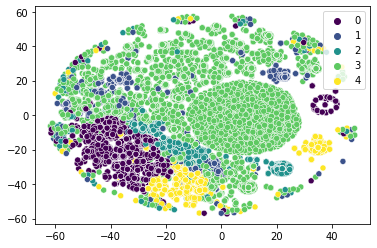

In [73]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### Class Report

In [74]:
classReport( columnLabel, clustersTotal )

Representation: class_kmeans_bow_token_frequency - class: 0



,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,class_kmeans_bow_token_frequency
28433,6556402583,RSFFN9YWEFQOP,4,"O livro é bom no geral, mas para crianças muit...",260,geral crianças pequena não recomendo pois maio...,164,45,0
146164,8576849941,R3RYFRLJ9OJ36M,1,Os conteúdos ficam em um site e não no livro.,45,conteúdos ficam site não livro,30,10,0
23680,8595083274,RUHXVHN4WT665,3,"O livro é OK, não traz nada de diferente dos d...",65,ok não traz nada diferente demais tema,38,14,0
137004,8565765482,R1G79BTO0O0SIT,2,O livro é muito parado e a ação só começa nas ...,120,parado ação começa últimas páginas não te pren...,71,24,0
116237,8532530788,R2RHTC4XT3F052,5,"No entanto, eu gostei da qualidade delas, clar...",110,entanto gostei qualidade delas claro não gross...,73,20,0
176556,8544106595,R1O2CRZ6GGKWST,5,Não imaginei que fosse gostar tanto desse livr...,175,não imaginei fosse gostar tanto desse livro am...,144,27,0
170539,8565765695,R1HN4AODTF39UK,5,"Amei a capa, as folhas amarelas, e o marca pág...",114,amei capa folhas amarelas marca página q vem j...,78,22,0
8729,8550802751,R384YHXUM7XCTU,2,"Com relação as ideias, o autor coloca várias c...",122,relação ideias autor coloca várias conclusões ...,97,22,0
160309,8501117846,R1BFWIJ7V8LP0I,5,"eu simplesmente não sabia o que sentir, se ain...",323,simplesmente não sabia sentir gostava lowen de...,203,61,0
77975,8543108683,R13VOWO5JAGJW4,5,"As lições apresentadas são ótimas, tenho certe...",105,lições apresentadas ótimas tenho certeza após ...,70,19,0



Sentences by score from class 0
5    4978
4    1199
3     716
2     421
1     496
Name: review_rating, dtype: int64

Examples from class 0

E um dos melhores, se não o melhor técnico do Brasil!

---------------------------------------------------------------------------------------------------------

Há muitas coisa interessantes que dá para aplicar, mas se você é daqueles que se preocupa antes com os outros do que com você mesmo, talvez a mensagem do autor não seja para você.

---------------------------------------------------------------------------------------------------------

Costumava ter o hábito de ter pensamentos negativos com a desculpa de que se algo realmente desse errado eu não me decepcionaria tanto por não ter criado expectativas.

---------------------------------------------------------------------------------------------------------

Não é um livro ruim porém não é fácil de digerir a mensagem sendo transmitida pelo autor.

------------------------------------------

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,class_kmeans_bow_token_frequency
110814,8542209826,R2JN3ZMKYDTNI3,5,Recomendo com lágrimas nós olhos quero todos l...,51,recomendo lágrimas olhos quero leiam,36,8,1
68065,8535909559,R35Y6IO5GCKJQA,5,"livro muito bom, recomendo - boa leitura!!leit...",106,bom recomendo boa leituraleitura fascinante es...,80,15,1
24168,8595083274,R3SBVUDQEWRXV2,5,Ótimo guia para quem quer iniciar no mundo dos...,54,ótimo guia quer iniciar mundo primos,36,10,1
73227,8555340896,RH0VDOO1PAEBL,5,"❤ Recomendo muito, por favor leiam!!!",37,recomendo muito favor leiam,27,6,1
29435,8584440739,R2YTKBYLS1E6JI,5,Recomendo se estiver buscando uma ajuda emerge...,52,recomendo estiver buscando ajuda emergencial,44,7,1
24954,8595083274,RZCK69I8O15P7,5,"O melhor, que livro thiago mandou muito bem ne...",68,melhor thiago mandou nesse livro recomendo,42,12,1
19547,8584391509,R3KGP7SKRCFDI8,5,"Ótimo livro, amei como foi desenvolvido e fiqu...",81,ótimo livro amei desenvolvido fiquei impressio...,56,13,1
17628,8584391509,R1OEPKNNPF9SP6,5,Recomendo para aqueles que estão em busca de u...,93,recomendo aqueles estão busca trama envolvente...,61,17,1
136668,8543109701,R1RGFPD3WIFRIG,5,"Recomendo. Linguagem simples, conteúdo leve e ...",55,recomendo linguagem simples conteúdo leve didá...,50,7,1
154014,8543105692,R2H377WHFHGE3C,5,"Chegou hoje, muito bem embalado, preço ótimo e...",62,chegou hoje embalado preço ótimo entrega rápida,47,10,1



Sentences by score from class 1
5    1782
4     205
3      47
2      15
1       6
Name: review_rating, dtype: int64

Examples from class 1

Nos mostra o como é importante ficar no essencial!Super recomendo!

---------------------------------------------------------------------------------------------------------

Ótimo para vários tipos de negócios, especialmente para vendas online.

---------------------------------------------------------------------------------------------------------

Um ótimo livro para quem quer adquirir novos hábitos e necessita de um passo a passo.

---------------------------------------------------------------------------------------------------------

Um bom livro, chegou em ótimo estado.

---------------------------------------------------------------------------------------------------------

livro é ótimo, amei que tem vários desenhos, os recortes curiosos são perfeitos!!!!COMPREM SEM MEDOOOOO

------------------------------------------------------------

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,class_kmeans_bow_token_frequency
130676,8501105732,RJC6P3N11SR68,4,"A primeira metade do livro é meio arrastada, m...",117,primeira metade meio arrastada segunda metade ...,82,22,2
146785,8551002341,R3CMKSCD7GRPAI,5,"Lina toma o diário nas mãos, passa algumas pág...",190,lina toma diário mãos passa algumas páginas en...,148,37,2
171480,8565765695,R13MSU2HWM95AQ,5,Além disso a história é muito boa!,34,além disso história boa,23,7,2
16724,8584391509,R1IBI9SJHRPE4Z,5,A autora através de uma história entusiasmante...,273,autora através história entusiasmante sucesso ...,213,40,2
66660,8535909559,R1MTDPPC3MC88Y,5,O livro é tão bom que a parte ruim é que a his...,84,parte ruim história pequena logo vc acaba ler,45,20,2
72998,8555340896,R2AIA9CN2G976N,4,"Primeira vez que li algo da autora, gostei mui...",74,primeira vez li algo autora gostei escrita his...,51,14,2
31293,6580309318,R13TCLNRSHD7L9,5,Uma história que te envolve já no primeiro cap...,52,história te envolve primeiro capítulo,37,9,2
130753,8501105732,R3IB9EUFJ0GIV8,3,"A história é mt boa, porém o livro veio com er...",84,história mt boa veio erros impressão algumas p...,52,16,2
113130,8542209826,R3PB6OO1YFMQ4Y,5,Uma história incrível cheia de surpresas e C m,46,história incrível cheia surpresas c m,37,9,2
169922,8565765695,R1X70D76QWZFO7,5,"Terminei o livro em uma semana, a história te ...",291,terminei semana história te prende maneira ina...,203,48,2



Sentences by score from class 2
5    2324
4     341
3     111
2      44
1      37
Name: review_rating, dtype: int64

Examples from class 2

Amei a história, amei os personagens.

---------------------------------------------------------------------------------------------------------

Foi muito difícil gostar do livro por causa disso, e eu fico triste por isso, porque muita gente gostou e a história realmente tem um baita potencial, mas a meu ver, foi pobremente desenvolvida.

---------------------------------------------------------------------------------------------------------

É lindo como a autora conta a história de Raissa e Ayla de forma tão natural e cativante, da forma exata como deve ser: normal e natural!

---------------------------------------------------------------------------------------------------------

O livro trata de história e casos intermináveis, portanto, deixa quase que tempo algum para de fato auxiliar o leitor na mudança de comportamento.

----------------

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,class_kmeans_bow_token_frequency
74122,6555111100,R1QTOBLPDAIKUZ,5,Tenha um espaço para isso e mantenha a mentali...,83,tenha espaço mantenha mentalidade suficiente t...,55,15,3
111250,8542209826,R29XA7OPEN44C2,2,Com 8 anos eu tinha nojo dessas coisas.,39,anos tinha nojo dessas coisas,29,8,3
6025,8501112518,R37NL3KXLX8RZE,5,Ler este livro é embarca em uma aventura emoci...,100,embarca aventura emocionante personagens incri...,66,14,3
35955,8547000240,R1EFTRLCD6YDN2,4,Quanto ao livro poderia ter sido mais objetivo...,64,quanto poderia sido objetivo menos prolixo,42,10,3
171078,8565765695,R1E858T3H3N9X,5,Fora que chegou bem embalado e em perfeito est...,50,fora chegou embalado perfeito estado,36,9,3
18345,8584391509,R2CZHMPAT14WSP,5,"Me surpreendeu de todas as formas, Evelyn é ap...",87,surpreendeu todas formas evelyn apaixonante te...,60,14,3
72363,8555340896,R1O1PYYSIXE16B,5,"Foi lindo ver o questionamento da Raíssa, mas ...",99,lindo ver questionamento raíssa perceber lado ...,57,18,3
13542,8568014003,R2VGUTZ8QTIHWZ,5,É um livro surpreendente que nos obriga a repe...,98,surpreendente obriga repensar nossos dogmas at...,67,15,3
67103,8535909559,RDC2L179Y440G,5,"Livro extremamente atual, de leitura fácil!",43,extremamente atual fácil,24,6,3
146322,8576849941,R260WEHH7HB8ZD,5,"No entanto, tem muita enrolação, principalment...",58,entanto muita enrolação principalmente início,45,8,3



Sentences by score from class 3
5    26254
4     4136
3     1937
2      930
1     1144
Name: review_rating, dtype: int64

Examples from class 3

É aquele tipo de leitura que todos deveriam vivenciar.

---------------------------------------------------------------------------------------------------------

Um livro bom para passar o tempo, ambientação muito bacana, um romance bem fofo.

---------------------------------------------------------------------------------------------------------

O autor propõe novas formas de pensamento com relação ao trabalho e ganho de dinheiro.

---------------------------------------------------------------------------------------------------------

O Pequeno Príncipe é uma obra sensível, que nos ensina sobre amor, afeto e amizade.

---------------------------------------------------------------------------------------------------------

Daphne até tem seus pretendentes, mas nenhum suficientemente adequado ou capaz de despertar-lhe a mínima afeição.



,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,class_kmeans_bow_token_frequency
744,8595081530,R2FY1LR4C93HEE,5,Cada página há um aprendizado para levar para ...,58,página há aprendizado levar vida toda,37,11,4
41547,8543104335,R4FP1G6HE6HYE,4,mas é este o “modus operandi” de quase todos n...,214,“modus operandi” quase nós: reverenciamos aque...,159,34,4
153015,8543105692,RIV4EVUNEN070,5,Ahh e ele pode ser ainda melhor se você ler ta...,97,ahh pode 12 regras vida jordan b peterson,41,21,4
9069,8550802751,R4KO7IKT034MY,5,"Assim, 12 Regras Para a Vida é uma leitura ess...",93,assim 12 regras vida essencial qualquer moment...,57,18,4
122409,8551006754,R1XYBUZZ3Y5ADJ,5,"De fato, um dos mais belos livros que já vi na...",52,fato belos vi vida,18,12,4
12213,8568014003,RWX2C585UC1D2,5,"Cada pergunta, cada resposta é uma reflexão pa...",69,pergunta resposta reflexão melhoras nossa vida,46,11,4
15995,8568014003,R3E01IAQJMQUS5,5,Napoleon Hill e sempre cirúrgico e direto em s...,117,napoleon hill sempre cirúrgico direto seus liv...,92,19,4
153316,8543105692,R2E30LGJI4C874,5,Só vc pode tomar as decisões que quer na sua v...,50,vc pode tomar decisões quer vida,32,11,4
23434,8595083274,R3384KZXKF3CL3,5,"Recomendo a todas as pessoas, que como eu, for...",111,recomendo todas pessoas eu foram educadas trab...,85,20,4
33537,6580309318,R3B4GAQ3P61T3G,5,trechos marcantes que nos levam à reflexão de ...,85,trechos marcantes levam à reflexão diversos as...,68,14,4



Sentences by score from class 4
5    2456
4     264
3      89
2      26
1      42
Name: review_rating, dtype: int64

Examples from class 4

A escrita de Itamar Vieira Junior nos transporta para a vida na roça trazendo a situação dos quilombolas.

---------------------------------------------------------------------------------------------------------

Ainda assim, soube amar demais uma única pessoa, por toda a vida.

---------------------------------------------------------------------------------------------------------

Recomendo para quem não tem nenhuma experiência com a vida financeira e almeja começar a investir.

---------------------------------------------------------------------------------------------------------

Leitura obrigatória para quem quer mudar sua vida.

---------------------------------------------------------------------------------------------------------

Para quem quer mudar de vida e deixar de procrastinar, esse livro é um bom impulsionador.

--------------

### K-Means - BoW - Sparse Matrix - Binary

In [75]:
kmeans = KMeans(n_clusters=clustersTotal, random_state=0).fit( dfBowBinary )
kmeans

KMeans(n_clusters=5, random_state=0)

#### Labels and Centroids

In [76]:
# kmeans.labels_

In [77]:
# kmeans.cluster_centers_

In [78]:
columnLabel = 'class_kmeans_bow_binary'

In [79]:
analysisDf[columnLabel] = kmeans.labels_
analysisDf.head()

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,class_kmeans_bow_token_frequency,class_kmeans_bow_binary
74122,6555111100,R1QTOBLPDAIKUZ,5,Tenha um espaço para isso e mantenha a mentali...,83,tenha espaço mantenha mentalidade suficiente t...,55,15,3,1
111250,8542209826,R29XA7OPEN44C2,2,Com 8 anos eu tinha nojo dessas coisas.,39,anos tinha nojo dessas coisas,29,8,3,1
744,8595081530,R2FY1LR4C93HEE,5,Cada página há um aprendizado para levar para ...,58,página há aprendizado levar vida toda,37,11,4,1
6025,8501112518,R37NL3KXLX8RZE,5,Ler este livro é embarca em uma aventura emoci...,100,embarca aventura emocionante personagens incri...,66,14,3,1
35955,8547000240,R1EFTRLCD6YDN2,4,Quanto ao livro poderia ter sido mais objetivo...,64,quanto poderia sido objetivo menos prolixo,42,10,3,1


In [80]:
analysisDf[columnLabel].value_counts().sort_index()

0     1595
1    35252
2     2714
3     8079
4     2360
Name: class_kmeans_bow_binary, dtype: int64

#### PCA

In [81]:
# %%time

# pcaBowBinary = PCA( n_components=2 )
# principalComponentsBowBinary = pcaBowBinary.fit_transform( dfBowBinary )

In [82]:
# a = []
# b = []
# for item in principalComponentsBowBinary:
#     # print(item[0])
#     a.append( item[0] )
#     b.append( item[1] )

In [83]:
# sns.scatterplot(
#     x = a, 
#     y = b,
#     hue = kmeans.labels_,
#     palette = 'viridis')

#### MDS

In [84]:
# %%time

# mds = MDS(n_components=2)
# mds = mds.fit_transform( dfBowBinary )
# mds.shape

In [85]:
# a = []
# b = []
# for item in mds:
#     # print(item[0])
#     a.append( item[0] )
#     b.append( item[1] )

In [86]:
# sns.scatterplot(
#     x = a, 
#     y = b,
#     hue = kmeans.labels_,
#     palette = 'viridis')

#### TSNE

In [87]:
%%time

tsne = TSNE(n_components=2)
tsne = tsne.fit_transform( dfBowBinary )
tsne.shape

CPU times: user 17min 26s, sys: 55.8 s, total: 18min 21s
Wall time: 5min 44s


(50000, 2)

In [88]:
a = []
b = []
for item in tsne:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

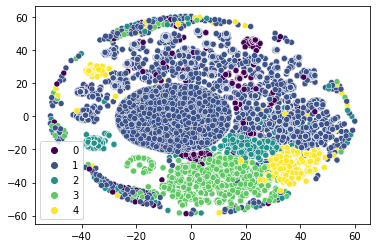

In [89]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### Class Report

In [90]:
classReport( columnLabel, clustersTotal )

Representation: class_kmeans_bow_binary - class: 0



,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,class_kmeans_bow_token_frequency,class_kmeans_bow_binary
122292,8551006754,R1S41NN8D6SXV4,5,Coraline é uma obra que vai muito além do film...,260,coraline obra vai além filme laika studios det...,164,53,3,0
156303,6599039812,R5DJ35YZ0MB0Q,5,"O livro toca em muitos sentimentos, especialme...",71,toca muitos sentimentos especialmente faz terapia,49,11,3,0
881,8595081530,RX6PS50A4VLMK,5,Adoro a época e local onde as histórias aconte...,106,adoro época local onde histórias acontecem aut...,88,19,3,0
88026,8555341612,R10ZQZA51J0N78,5,O formato HQ faz com a leitura seja fluída e e...,56,formato hq faz seja fluída envolvente,37,11,3,0
10351,8550802751,R2PHU8Y8ZRU97K,5,O autor consegue prender a atenção com os exem...,112,autor consegue prender atenção exemplos situaç...,78,21,3,0
158263,6558380544,R3OIA6982V690P,5,Faz vc refletir sobre sua vida.,31,faz vc refletir vida,20,6,4,0
71462,8555340896,R2R52AZ27TSJNY,5,"É leve, divertido e te faz querer começar a jo...",92,leve divertido te faz querer começar jogar fee...,73,16,3,0
36298,8547000240,R27L5M2KTNQ52L,5,Faz você repensar suas atitudes e pensamentos!,46,faz repensar suas atitudes pensamentos,38,7,3,0
79498,8575422391,R28P6O1DC9N5QW,5,Esclarecedor e nos faz abrir nossa mente para ...,100,esclarecedor faz abrir nossa mente maturidade ...,79,15,3,0
133344,8535933395,R19RJEU7G8600P,5,"A escrita pode te deixar um pouco confuso, ent...",102,escrita pode te confuso então precisa atendo p...,64,17,3,0



Sentences by score from class 0
5    1346
4     158
3      52
2      18
1      21
Name: review_rating, dtype: int64

Examples from class 0

Muito bom, te faz ver o mundo com outros olhos.

---------------------------------------------------------------------------------------------------------

O autor faz citações de diversos autores de varios idiomas que foram traduzidas no livro, exceto no capitulo 6.

---------------------------------------------------------------------------------------------------------

Um livro que te traz muito para a ação, para por em pratica.

---------------------------------------------------------------------------------------------------------

É uma leitura rápida e gostosa e te deixa com uma reflexão.

---------------------------------------------------------------------------------------------------------

Te ensina uma mentalidade que realmente serve para ser aplicada.

--------------------------------------------------------------------------------

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,class_kmeans_bow_token_frequency,class_kmeans_bow_binary
74122,6555111100,R1QTOBLPDAIKUZ,5,Tenha um espaço para isso e mantenha a mentali...,83,tenha espaço mantenha mentalidade suficiente t...,55,15,3,1
111250,8542209826,R29XA7OPEN44C2,2,Com 8 anos eu tinha nojo dessas coisas.,39,anos tinha nojo dessas coisas,29,8,3,1
744,8595081530,R2FY1LR4C93HEE,5,Cada página há um aprendizado para levar para ...,58,página há aprendizado levar vida toda,37,11,4,1
6025,8501112518,R37NL3KXLX8RZE,5,Ler este livro é embarca em uma aventura emoci...,100,embarca aventura emocionante personagens incri...,66,14,3,1
35955,8547000240,R1EFTRLCD6YDN2,4,Quanto ao livro poderia ter sido mais objetivo...,64,quanto poderia sido objetivo menos prolixo,42,10,3,1
18345,8584391509,R2CZHMPAT14WSP,5,"Me surpreendeu de todas as formas, Evelyn é ap...",87,surpreendeu todas formas evelyn apaixonante te...,60,14,3,1
110814,8542209826,R2JN3ZMKYDTNI3,5,Recomendo com lágrimas nós olhos quero todos l...,51,recomendo lágrimas olhos quero leiam,36,8,1,1
72363,8555340896,R1O1PYYSIXE16B,5,"Foi lindo ver o questionamento da Raíssa, mas ...",99,lindo ver questionamento raíssa perceber lado ...,57,18,3,1
41547,8543104335,R4FP1G6HE6HYE,4,mas é este o “modus operandi” de quase todos n...,214,“modus operandi” quase nós: reverenciamos aque...,159,34,4,1
13542,8568014003,R2VGUTZ8QTIHWZ,5,É um livro surpreendente que nos obriga a repe...,98,surpreendente obriga repensar nossos dogmas at...,67,15,3,1



Sentences by score from class 1
5    26977
4     4273
3     1943
2      925
1     1134
Name: review_rating, dtype: int64

Examples from class 1

É um livro Tão intenso, tão cheio de amor e tantas emoções.

---------------------------------------------------------------------------------------------------------

Livro muito bom, com vários cases que mostram ao leitor as armadilhas de hábitos ruins e as facilidades que bons hábitos podem trazer pra nossa vida cotidiana.

---------------------------------------------------------------------------------------------------------

Cada qual em seu tempo e com suas emoções.

---------------------------------------------------------------------------------------------------------

O poder do hábito apresenta estudos de pacientes que por algum problema de saúde tiveram partes do cérebro comprometidas, e mesmo assim mantinham velhos hábitos e apresenta maneires de transformar novas atividades em hábitos

-----------------------------------------

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,class_kmeans_bow_token_frequency,class_kmeans_bow_binary
130676,8501105732,RJC6P3N11SR68,4,"A primeira metade do livro é meio arrastada, m...",117,primeira metade meio arrastada segunda metade ...,82,22,2,2
146785,8551002341,R3CMKSCD7GRPAI,5,"Lina toma o diário nas mãos, passa algumas pág...",190,lina toma diário mãos passa algumas páginas en...,148,37,2,2
171480,8565765695,R13MSU2HWM95AQ,5,Além disso a história é muito boa!,34,além disso história boa,23,7,2,2
16724,8584391509,R1IBI9SJHRPE4Z,5,A autora através de uma história entusiasmante...,273,autora através história entusiasmante sucesso ...,213,40,2,2
66660,8535909559,R1MTDPPC3MC88Y,5,O livro é tão bom que a parte ruim é que a his...,84,parte ruim história pequena logo vc acaba ler,45,20,2,2
72998,8555340896,R2AIA9CN2G976N,4,"Primeira vez que li algo da autora, gostei mui...",74,primeira vez li algo autora gostei escrita his...,51,14,2,2
31293,6580309318,R13TCLNRSHD7L9,5,Uma história que te envolve já no primeiro cap...,52,história te envolve primeiro capítulo,37,9,2,2
130753,8501105732,R3IB9EUFJ0GIV8,3,"A história é mt boa, porém o livro veio com er...",84,história mt boa veio erros impressão algumas p...,52,16,2,2
113130,8542209826,R3PB6OO1YFMQ4Y,5,Uma história incrível cheia de surpresas e C m,46,história incrível cheia surpresas c m,37,9,2,2
169922,8565765695,R1X70D76QWZFO7,5,"Terminei o livro em uma semana, a história te ...",291,terminei semana história te prende maneira ina...,203,48,2,2



Sentences by score from class 2
5    2204
4     328
3     105
2      43
1      34
Name: review_rating, dtype: int64

Examples from class 2

E, no meu vocabulário faltam palavras para expressar elogios adequados à história.

---------------------------------------------------------------------------------------------------------

Me fez querer visitar Florença e me fez pesquisar mais sobre o local, gostei bastante da protagonista com seus defeitos e qualidades, ela foi dita como chata as vezes nas avaliações mas ela é uma adolescente e vamos combinar que adolescente é chato mesmo(inclusive sou) e se for parar pra comparar com outros a Lina é tranquila, ela estava se apaixonado, passando pelo luto recente da mãe, tinha mudado de país e tinha muuuitas dúvidas sobre sua história, tudo isso é coisa demais e ela merece ser chata as vezes sim.

---------------------------------------------------------------------------------------------------------

Livro sensacional, a história de Poppy e R

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,class_kmeans_bow_token_frequency,class_kmeans_bow_binary
28433,6556402583,RSFFN9YWEFQOP,4,"O livro é bom no geral, mas para crianças muit...",260,geral crianças pequena não recomendo pois maio...,164,45,0,3
146164,8576849941,R3RYFRLJ9OJ36M,1,Os conteúdos ficam em um site e não no livro.,45,conteúdos ficam site não livro,30,10,0,3
23680,8595083274,RUHXVHN4WT665,3,"O livro é OK, não traz nada de diferente dos d...",65,ok não traz nada diferente demais tema,38,14,0,3
137004,8565765482,R1G79BTO0O0SIT,2,O livro é muito parado e a ação só começa nas ...,120,parado ação começa últimas páginas não te pren...,71,24,0,3
116237,8532530788,R2RHTC4XT3F052,5,"No entanto, eu gostei da qualidade delas, clar...",110,entanto gostei qualidade delas claro não gross...,73,20,0,3
176556,8544106595,R1O2CRZ6GGKWST,5,Não imaginei que fosse gostar tanto desse livr...,175,não imaginei fosse gostar tanto desse livro am...,144,27,0,3
170539,8565765695,R1HN4AODTF39UK,5,"Amei a capa, as folhas amarelas, e o marca pág...",114,amei capa folhas amarelas marca página q vem j...,78,22,0,3
8729,8550802751,R384YHXUM7XCTU,2,"Com relação as ideias, o autor coloca várias c...",122,relação ideias autor coloca várias conclusões ...,97,22,0,3
160309,8501117846,R1BFWIJ7V8LP0I,5,"eu simplesmente não sabia o que sentir, se ain...",323,simplesmente não sabia sentir gostava lowen de...,203,61,0,3
77975,8543108683,R13VOWO5JAGJW4,5,"As lições apresentadas são ótimas, tenho certe...",105,lições apresentadas ótimas tenho certeza após ...,70,19,0,3



Sentences by score from class 3
5    5192
4    1224
3     725
2     427
1     511
Name: review_rating, dtype: int64

Examples from class 3

É uma leitura suave e você acha que o final vai ser do mesmo jeito, mas não vai, foi destruidor.

---------------------------------------------------------------------------------------------------------

Ainda não li, mais o acabamento e qualidade muito bom.

---------------------------------------------------------------------------------------------------------

Até hoje não li a saga do Senhor dos Anéis mas esse livro sozinho já vale uma grande experiência.

---------------------------------------------------------------------------------------------------------

Ainda não li o livro, mas chegou em perfeitas condições, tudo certinho e no prazo

---------------------------------------------------------------------------------------------------------

É impossível não se apaixonar por Raíssa e Ayla!

---------------------------------------------

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,class_kmeans_bow_token_frequency,class_kmeans_bow_binary
171078,8565765695,R1E858T3H3N9X,5,Fora que chegou bem embalado e em perfeito est...,50,fora chegou embalado perfeito estado,36,9,3,4
54625,8595084742,RBUBFVPELJ2OL,5,O produto chegou em perfeitas condições e ant...,59,produto chegou perfeitas condições antes prazo,46,10,3,4
123634,8551006754,RRCSD3OY0L3UG,4,"Para inicio de conversa fiz uma ótima compra, ...",145,inicio conversa fiz ótima compra visto chegou ...,103,26,3,4
75404,6555650001,R2CHOM0MXVFJ7C,5,"O livro chegou impecável, sem nenhum amasso.",44,chegou impecável sem nenhum amasso,34,7,3,4
24113,8595083274,R117HY1Q9MM8W4,5,"Chegou super rápido, menos de 10 dias e sem ne...",59,chegou rápido menos 10 dias sem nenhum defeito,46,11,3,4
163852,8594541473,R3JDPQ5EJZC53,4,"O livro é muito lindo, chegou antes do prazo ...",102,lindo chegou antes prazo porem veio imperfeiçõ...,57,20,3,4
116913,8532530788,R2WX09FJEWDPAS,5,"Livro excelente estado de entrega, chegou rápi...",71,excelente estado entrega chegou rápido excelen...,55,11,3,4
125333,8551006754,R3JMW73TO9W7R9,5,chegou em perfeito estado e cinco dias antes,44,chegou perfeito estado cinco dias antes,39,8,3,4
19881,8584391509,RE4CAU44GC1YM,5,Chegou rápido e veio bem embalado.,34,chegou rápido veio embalado,27,6,3,4
169816,8565765695,R2BJUHYC6KDQ2H,5,A Rainha Vermelha já chegou arrebatando meu co...,52,rainha vermelha chegou arrebatando coração,42,8,3,4



Sentences by score from class 4
5    2075
4     162
3      75
2      23
1      25
Name: review_rating, dtype: int64

Examples from class 4

Quando ele chegou fiquei impressionada com o quão rosa ele é.

---------------------------------------------------------------------------------------------------------

chegou tudo certo e muito rápido ótimo produto

---------------------------------------------------------------------------------------------------------

Livro chegou no prazo estimado, em perfeitas condições.

---------------------------------------------------------------------------------------------------------

meu pedido chegou no dia estabelecido e em perfeitas condições

---------------------------------------------------------------------------------------------------------

Chegou mega rápido e em perfeito estado!

---------------------------------------------------------------------------------------------------------

##################################################

### K-Means - BoW - Sparse Matrix - TF-IDF

In [91]:
kmeans = KMeans(n_clusters=clustersTotal, random_state=0).fit( dfBowTFIDF )
kmeans

KMeans(n_clusters=5, random_state=0)

#### Labels and Centroids

In [92]:
# kmeans.labels_

In [93]:
# kmeans.cluster_centers_

In [94]:
columnLabel = 'class_kmeans_bow_tfidf'

In [95]:
analysisDf[columnLabel] = kmeans.labels_
analysisDf.head()

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,class_kmeans_bow_token_frequency,class_kmeans_bow_binary,class_kmeans_bow_tfidf
74122,6555111100,R1QTOBLPDAIKUZ,5,Tenha um espaço para isso e mantenha a mentali...,83,tenha espaço mantenha mentalidade suficiente t...,55,15,3,1,0
111250,8542209826,R29XA7OPEN44C2,2,Com 8 anos eu tinha nojo dessas coisas.,39,anos tinha nojo dessas coisas,29,8,3,1,0
744,8595081530,R2FY1LR4C93HEE,5,Cada página há um aprendizado para levar para ...,58,página há aprendizado levar vida toda,37,11,4,1,4
6025,8501112518,R37NL3KXLX8RZE,5,Ler este livro é embarca em uma aventura emoci...,100,embarca aventura emocionante personagens incri...,66,14,3,1,0
35955,8547000240,R1EFTRLCD6YDN2,4,Quanto ao livro poderia ter sido mais objetivo...,64,quanto poderia sido objetivo menos prolixo,42,10,3,1,0


In [96]:
analysisDf[columnLabel].value_counts().sort_index()

0    36335
1     1881
2     3011
3     6005
4     2768
Name: class_kmeans_bow_tfidf, dtype: int64

#### PCA

In [97]:
# %%time

# pca = PCA( n_components=2 )
# principalComponents = pca.fit_transform( dfBowTFIDF )

In [98]:
# a = []
# b = []
# for item in principalComponents:
#     # print(item[0])
#     a.append( item[0] )
#     b.append( item[1] )

In [99]:
# sns.scatterplot(
#     x = a, 
#     y = b,
#     hue = kmeans.labels_,
#     palette = 'viridis')

#### MDS

In [100]:
# %%time

# mds = MDS(n_components=2)
# mds = mds.fit_transform( dfBowTFIDF )
# mds.shape

In [101]:
# a = []
# b = []
# for item in mds:
#     # print(item[0])
#     a.append( item[0] )
#     b.append( item[1] )

In [102]:
# sns.scatterplot(
#     x = a, 
#     y = b,
#     hue = kmeans.labels_,
#     palette = 'viridis')

#### TSNE

In [103]:
%%time

tsne = TSNE(n_components=2)
tsne = tsne.fit_transform( dfBowTFIDF )
tsne.shape

CPU times: user 13min 9s, sys: 29.2 s, total: 13min 38s
Wall time: 4min 26s


(50000, 2)

In [104]:
a = []
b = []
for item in tsne:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

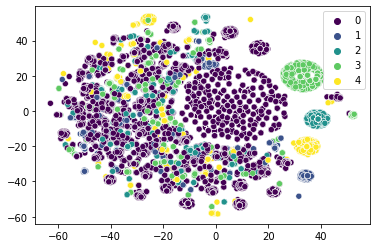

In [105]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### Class Report

In [106]:
classReport( columnLabel, clustersTotal )

Representation: class_kmeans_bow_tfidf - class: 0



,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,class_kmeans_bow_token_frequency,class_kmeans_bow_binary,class_kmeans_bow_tfidf
74122,6555111100,R1QTOBLPDAIKUZ,5,Tenha um espaço para isso e mantenha a mentali...,83,tenha espaço mantenha mentalidade suficiente t...,55,15,3,1,0
111250,8542209826,R29XA7OPEN44C2,2,Com 8 anos eu tinha nojo dessas coisas.,39,anos tinha nojo dessas coisas,29,8,3,1,0
6025,8501112518,R37NL3KXLX8RZE,5,Ler este livro é embarca em uma aventura emoci...,100,embarca aventura emocionante personagens incri...,66,14,3,1,0
35955,8547000240,R1EFTRLCD6YDN2,4,Quanto ao livro poderia ter sido mais objetivo...,64,quanto poderia sido objetivo menos prolixo,42,10,3,1,0
171078,8565765695,R1E858T3H3N9X,5,Fora que chegou bem embalado e em perfeito est...,50,fora chegou embalado perfeito estado,36,9,3,4,0
18345,8584391509,R2CZHMPAT14WSP,5,"Me surpreendeu de todas as formas, Evelyn é ap...",87,surpreendeu todas formas evelyn apaixonante te...,60,14,3,1,0
110814,8542209826,R2JN3ZMKYDTNI3,5,Recomendo com lágrimas nós olhos quero todos l...,51,recomendo lágrimas olhos quero leiam,36,8,1,1,0
72363,8555340896,R1O1PYYSIXE16B,5,"Foi lindo ver o questionamento da Raíssa, mas ...",99,lindo ver questionamento raíssa perceber lado ...,57,18,3,1,0
13542,8568014003,R2VGUTZ8QTIHWZ,5,É um livro surpreendente que nos obriga a repe...,98,surpreendente obriga repensar nossos dogmas at...,67,15,3,1,0
67103,8535909559,RDC2L179Y440G,5,"Livro extremamente atual, de leitura fácil!",43,extremamente atual fácil,24,6,3,1,0



Sentences by score from class 0
5    27848
4     4391
3     2014
2      956
1     1126
Name: review_rating, dtype: int64

Examples from class 0

A qualidade da edição é maravilhosa exceto pela capa branca que suja em dois dias na mochila rs o livro merece todo essa comoção que criou.

---------------------------------------------------------------------------------------------------------

É diferente dos outros, mas é revigorante, sincero e com drama na medida certa.

---------------------------------------------------------------------------------------------------------

Essa edição de capa dura é belíssima, com várias ilustrações coloridas (também tem várias preto e branco) que são uma obra por si só.

---------------------------------------------------------------------------------------------------------

Toda pessoa deveria ter esse livro na sua cabeceira!

---------------------------------------------------------------------------------------------------------

Era a resposta 

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,class_kmeans_bow_token_frequency,class_kmeans_bow_binary,class_kmeans_bow_tfidf
32905,6580309318,R39T2YPJB3Q3UX,5,"Comecei a ler sem grandes expectativas, e só l...",83,comecei sem grandes expectativas larguei quand...,66,13,3,1,1
75404,6555650001,R2CHOM0MXVFJ7C,5,"O livro chegou impecável, sem nenhum amasso.",44,chegou impecável sem nenhum amasso,34,7,3,4,1
24113,8595083274,R117HY1Q9MM8W4,5,"Chegou super rápido, menos de 10 dias e sem ne...",59,chegou rápido menos 10 dias sem nenhum defeito,46,11,3,4,1
8576,8501112518,R1BUEI0CX6BHA1,5,"Sem sombra de dúvidas, em livro necessário par...",65,sem sombra dúvidas necessário gêneros,37,11,3,1,1
138108,8565765482,R1OZK1CE3KKEXM,3,Apesar de triste a leitura é facil e sem grand...,59,apesar triste facil sem grandes surpresas,41,11,3,1,1
113834,8508196555,R1UTS9T7CXRKC,4,"Leiam!O que fica a desejar é a edição, pois es...",150,leiamo fica desejar edição pois está visível e...,115,28,3,1,1
64844,8535909559,R3CPMBWM9AGI1Q,4,Uma visão do mau que perpetua até os dias atua...,118,visão mau perpetua dias atuais forma cômica re...,75,23,3,1,1
51398,8595084742,RLROH2ADT9QMD,5,A qualidade de sua construção é incrivelmente ...,240,qualidade construção incrivelmente boa: capa d...,187,40,3,1,1
67382,8535909559,R8Z10FC2B70H1,5,"Transporte impecável, livro sem arranhão ou am...",53,transporte impecável sem arranhão amassado,42,7,3,1,1
44402,8501117684,R28IOJ4AMC2K16,5,🥰 sem dúvidas a Colleen Hoover é minha autora ...,54,sem dúvidas colleen hoover autora favorita,42,10,3,1,1



Sentences by score from class 1
5    1436
4     186
3      92
2      69
1      98
Name: review_rating, dtype: int64

Examples from class 1

Estou sem palavras para descrever mas vale muito apena comprar, ele é perfeito

---------------------------------------------------------------------------------------------------------

tirando q demorou mt veio todo certinho, muito lindo e sem nenhum defeito

---------------------------------------------------------------------------------------------------------

Só sei que estou sem palavras e com meu coração partido!

---------------------------------------------------------------------------------------------------------

a capa sem palavras para isso e tão linda, brilhosa com lantejoula, ainda não li o livroEstá no plástico

---------------------------------------------------------------------------------------------------------

Este livro trata de um assunto altamente relevante para todas as épocas e mais especificamente no Brasil de hoje

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,class_kmeans_bow_token_frequency,class_kmeans_bow_binary,class_kmeans_bow_tfidf
130676,8501105732,RJC6P3N11SR68,4,"A primeira metade do livro é meio arrastada, m...",117,primeira metade meio arrastada segunda metade ...,82,22,2,2,2
146785,8551002341,R3CMKSCD7GRPAI,5,"Lina toma o diário nas mãos, passa algumas pág...",190,lina toma diário mãos passa algumas páginas en...,148,37,2,2,2
171480,8565765695,R13MSU2HWM95AQ,5,Além disso a história é muito boa!,34,além disso história boa,23,7,2,2,2
16724,8584391509,R1IBI9SJHRPE4Z,5,A autora através de uma história entusiasmante...,273,autora através história entusiasmante sucesso ...,213,40,2,2,2
66660,8535909559,R1MTDPPC3MC88Y,5,O livro é tão bom que a parte ruim é que a his...,84,parte ruim história pequena logo vc acaba ler,45,20,2,2,2
72998,8555340896,R2AIA9CN2G976N,4,"Primeira vez que li algo da autora, gostei mui...",74,primeira vez li algo autora gostei escrita his...,51,14,2,2,2
31293,6580309318,R13TCLNRSHD7L9,5,Uma história que te envolve já no primeiro cap...,52,história te envolve primeiro capítulo,37,9,2,2,2
130753,8501105732,R3IB9EUFJ0GIV8,3,"A história é mt boa, porém o livro veio com er...",84,história mt boa veio erros impressão algumas p...,52,16,2,2,2
113130,8542209826,R3PB6OO1YFMQ4Y,5,Uma história incrível cheia de surpresas e C m,46,história incrível cheia surpresas c m,37,9,2,2,2
7091,8501112518,R326LCY6SJKPWS,5,Mas se levarmos em consideração a história des...,117,levarmos consideração história desse vamos not...,80,20,0,3,2



Sentences by score from class 2
5    2395
4     376
3     135
2      62
1      43
Name: review_rating, dtype: int64

Examples from class 2

Ansiosa para ver essa história incrível em forma de filme!!

---------------------------------------------------------------------------------------------------------

Evelyn é um personagem bem complexo e para profundidade da história e a maneira como nos faz refletir eu acredito muito que a autora conseguiu captar a sua essência em poucas páginas.

---------------------------------------------------------------------------------------------------------

Que livro gostoso, devorei ele , li tão rápido, eu viajava na história, uma delícia de ler, uma leitura fofa e leve...

---------------------------------------------------------------------------------------------------------

Estou lendo e gostando da história.

---------------------------------------------------------------------------------------------------------

É uns dos melhore livros que

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,class_kmeans_bow_token_frequency,class_kmeans_bow_binary,class_kmeans_bow_tfidf
28433,6556402583,RSFFN9YWEFQOP,4,"O livro é bom no geral, mas para crianças muit...",260,geral crianças pequena não recomendo pois maio...,164,45,0,3,3
146164,8576849941,R3RYFRLJ9OJ36M,1,Os conteúdos ficam em um site e não no livro.,45,conteúdos ficam site não livro,30,10,0,3,3
23680,8595083274,RUHXVHN4WT665,3,"O livro é OK, não traz nada de diferente dos d...",65,ok não traz nada diferente demais tema,38,14,0,3,3
137004,8565765482,R1G79BTO0O0SIT,2,O livro é muito parado e a ação só começa nas ...,120,parado ação começa últimas páginas não te pren...,71,24,0,3,3
116237,8532530788,R2RHTC4XT3F052,5,"No entanto, eu gostei da qualidade delas, clar...",110,entanto gostei qualidade delas claro não gross...,73,20,0,3,3
176556,8544106595,R1O2CRZ6GGKWST,5,Não imaginei que fosse gostar tanto desse livr...,175,não imaginei fosse gostar tanto desse livro am...,144,27,0,3,3
8729,8550802751,R384YHXUM7XCTU,2,"Com relação as ideias, o autor coloca várias c...",122,relação ideias autor coloca várias conclusões ...,97,22,0,3,3
160309,8501117846,R1BFWIJ7V8LP0I,5,"eu simplesmente não sabia o que sentir, se ain...",323,simplesmente não sabia sentir gostava lowen de...,203,61,0,3,3
77975,8543108683,R13VOWO5JAGJW4,5,"As lições apresentadas são ótimas, tenho certe...",105,lições apresentadas ótimas tenho certeza após ...,70,19,0,3,3
15818,8568014003,R38VO7ELHU15BX,5,Recomendo este livro para todos que fracassara...,132,recomendo fracassaram sentem alienados não con...,72,21,0,3,3



Sentences by score from class 3
5    3752
4     935
3     575
2     324
1     419
Name: review_rating, dtype: int64

Examples from class 3

Ainda não li, mas espero que me prenda ns literatura como me prendeu a atenção com cada detalhe.

---------------------------------------------------------------------------------------------------------

Sei que provavelmente essa mesmo era a ideia da autora mas eu particularmente não gostei, não leria outros livros dela.

---------------------------------------------------------------------------------------------------------

a entrega foi rápida, e etc, mas o livro em si não é bom.

---------------------------------------------------------------------------------------------------------

A impressão não é muito boa, a espessura das letras é irregular em vários pontos e chega a preencher a bolinha de algumas letras e borrar as aspas.

---------------------------------------------------------------------------------------------------------

O li

,book_id,review_id,review_rating,sentence,s_size,cleaned_sentence,c_s_size,c_s_words_count,class_kmeans_bow_token_frequency,class_kmeans_bow_binary,class_kmeans_bow_tfidf
744,8595081530,R2FY1LR4C93HEE,5,Cada página há um aprendizado para levar para ...,58,página há aprendizado levar vida toda,37,11,4,1,4
41547,8543104335,R4FP1G6HE6HYE,4,mas é este o “modus operandi” de quase todos n...,214,“modus operandi” quase nós: reverenciamos aque...,159,34,4,1,4
153015,8543105692,RIV4EVUNEN070,5,Ahh e ele pode ser ainda melhor se você ler ta...,97,ahh pode 12 regras vida jordan b peterson,41,21,4,1,4
9069,8550802751,R4KO7IKT034MY,5,"Assim, 12 Regras Para a Vida é uma leitura ess...",93,assim 12 regras vida essencial qualquer moment...,57,18,4,1,4
122409,8551006754,R1XYBUZZ3Y5ADJ,5,"De fato, um dos mais belos livros que já vi na...",52,fato belos vi vida,18,12,4,1,4
12213,8568014003,RWX2C585UC1D2,5,"Cada pergunta, cada resposta é uma reflexão pa...",69,pergunta resposta reflexão melhoras nossa vida,46,11,4,1,4
15995,8568014003,R3E01IAQJMQUS5,5,Napoleon Hill e sempre cirúrgico e direto em s...,117,napoleon hill sempre cirúrgico direto seus liv...,92,19,4,1,4
153316,8543105692,R2E30LGJI4C874,5,Só vc pode tomar as decisões que quer na sua v...,50,vc pode tomar decisões quer vida,32,11,4,1,4
23434,8595083274,R3384KZXKF3CL3,5,"Recomendo a todas as pessoas, que como eu, for...",111,recomendo todas pessoas eu foram educadas trab...,85,20,4,1,4
33537,6580309318,R3B4GAQ3P61T3G,5,trechos marcantes que nos levam à reflexão de ...,85,trechos marcantes levam à reflexão diversos as...,68,14,4,1,4



Sentences by score from class 4
5    2363
4     257
3      84
2      25
1      39
Name: review_rating, dtype: int64

Examples from class 4

Indico o livro para todos que desejam mudar sua vida e se desenvolver como pessoas.

---------------------------------------------------------------------------------------------------------

Ótimo livro, incentiva muito querer sempre mais da nossa vida.

---------------------------------------------------------------------------------------------------------

Após a leitura do livro, vejo como nossa vida é toda feita por nossos hábitos.

---------------------------------------------------------------------------------------------------------

Em um de seus roubos, Mare encontra um rapaz misterioso, que ao invés de denunciá-la por sua prática ilegal, lhe estende ajuda e Mare passa a ter um novo rumo em sua vida.

---------------------------------------------------------------------------------------------------------

Sobre a mente consciente e su

## LDA

"By doing topic modeling, we build clusters of words rather than clusters of texts. A text is thus a mixture of all the topics, each having a specific weight"
From: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

### LDA - Gensim

In [107]:
# type( analysisDf['sentence'].tolist() )

In [108]:
# # Based on 
# # https://www.tutorialspoint.com/gensim/gensim_creating_a_bag_of_words_corpus.htm
# # https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
# doc_tokenized = [ simple_preprocess( str(sentence) ) for sentence in analysisDf['sentence'].tolist() ]
# dictionary = Dictionary()
# BoW_corpus = [ dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized ]
# # print(BoW_corpus)

In [109]:
# id_words = [[(dictionary[id], count) for id, count in line] for line in BoW_corpus]
# # print(id_words)

In [110]:
# lda_model = LdaModel(
#     corpus=BoW_corpus,
#     id2word=dictionary,
#     num_topics=clustersTotal)
# pprint(lda_model.print_topics())
# # doc_lda = lda_model[BoW_corpus]

### LDA - Scikit-learn - BoW - Token Frequency

In [111]:
topicsTotalToShow = 10

In [112]:
LdaBowTokenFrequency = LatentDirichletAllocation(
    n_components = clustersTotal) #,
    # random_state = 42)
LdaBowTokenFrequency.fit( dfBowTokenFrequency )
# LdaBowTokenFrequency.components_

LatentDirichletAllocation(n_components=5)

In [113]:
for index, topic in enumerate(LdaBowTokenFrequency.components_):
    
    print( f'The top {topicsTotalToShow} words for TOPIC #{index}' )
    print( [ dfBowTokenFrequency.columns[i] for i in topic.argsort()[-topicsTotalToShow:] ] )
    print()

The top 10 words for TOPIC #0
['sempre', 'perfeito', 'faz', 'leitura', 'amei', 'quando', 'te', 'entrega', 'está', 'li']

The top 10 words for TOPIC #1
['não', 'faz', 'pelo', 'final', 'gostei', 'fácil', 'autora', 'sempre', 'capa', 'livro']

The top 10 words for TOPIC #2
['pelo', 'faz', 'lindo', 'ótimo', 'ela', ':', 'autor', 'sem', 'forma', 'vida']

The top 10 words for TOPIC #3
['lindo', 'ótimo', 'sem', 'excelente', 'tempo', 'recomendo', 'antes', 'perfeito', 'veio', 'chegou']

The top 10 words for TOPIC #4
['autora', 'faz', 'veio', 'final', 'pelo', 'te', 'ela', 'vai', 'história', 'não']



In [114]:
topicResultsBowTokenFrequency = LdaBowTokenFrequency.transform( dfBowTokenFrequency )

In [115]:
analysisDf['topic_lda_bow_token_frequency'] = topicResultsBowTokenFrequency.argmax(axis=1)

In [116]:
# analysisDf[ [ 'sentence', 's_size', 's_words_count', 'cleaned_sentence', 'c_s_size', 'c_s_words_count', 'topic_lda_bow_token_frequency'] ].head(10)
analysisDf[ [ 'sentence', 'cleaned_sentence', 'topic_lda_bow_token_frequency'] ].head(10)

,sentence,cleaned_sentence,topic_lda_bow_token_frequency
74122,Tenha um espaço para isso e mantenha a mentali...,tenha espaço mantenha mentalidade suficiente t...,0
111250,Com 8 anos eu tinha nojo dessas coisas.,anos tinha nojo dessas coisas,0
744,Cada página há um aprendizado para levar para ...,página há aprendizado levar vida toda,2
6025,Ler este livro é embarca em uma aventura emoci...,embarca aventura emocionante personagens incri...,0
35955,Quanto ao livro poderia ter sido mais objetivo...,quanto poderia sido objetivo menos prolixo,0
171078,Fora que chegou bem embalado e em perfeito est...,fora chegou embalado perfeito estado,3
18345,"Me surpreendeu de todas as formas, Evelyn é ap...",surpreendeu todas formas evelyn apaixonante te...,3
110814,Recomendo com lágrimas nós olhos quero todos l...,recomendo lágrimas olhos quero leiam,3
72363,"Foi lindo ver o questionamento da Raíssa, mas ...",lindo ver questionamento raíssa perceber lado ...,2
41547,mas é este o “modus operandi” de quase todos n...,“modus operandi” quase nós: reverenciamos aque...,2


### LDA - Scikit-learn - BoW - Binary

In [117]:
LdaBowBinary = LatentDirichletAllocation(
    n_components = clustersTotal) #,
    # random_state = 42)
LdaBowBinary.fit( dfBowBinary )
# LdaBowBinary.components_

LatentDirichletAllocation(n_components=5)

In [118]:
for index, topic in enumerate(LdaBowBinary.components_):
    
    print( f'The top {topicsTotalToShow} words for TOPIC #{index}' )
    print( [ dfBowBinary.columns[i] for i in topic.argsort()[-topicsTotalToShow:] ] )
    print()

The top 10 words for TOPIC #0
['tempo', 'fácil', 'lindo', 'ótimo', 'entrega', 'capa', 'antes', 'perfeito', 'veio', 'chegou']

The top 10 words for TOPIC #1
['faz', 'história', 'livro', 'vai', 'pelo', 'te', 'sempre', 'autora', 'forma', 'sem']

The top 10 words for TOPIC #2
['faz', 'leitura', 'te', 'tempo', 'livro', 'quando', 'ela', 'recomendo', 'li', 'vida']

The top 10 words for TOPIC #3
['tempo', 'fácil', 'livro', 'final', 'gostei', 'excelente', 'leitura', 'amei', ':', 'história']

The top 10 words for TOPIC #4
['pelo', 'gostei', 'te', 'vai', 'tempo', 'está', 'faz', 'autor', 'livro', 'não']



In [119]:
topicResultsBowBinary = LdaBowBinary.transform( dfBowBinary )

In [120]:
analysisDf['topic_lda_bow_binary'] = topicResultsBowBinary.argmax(axis=1)

In [121]:
# analysisDf[ [ 'sentence', 's_size', 's_words_count', 'cleaned_sentence', 'c_s_size', 'c_s_words_count', 'topic_lda_bow_token_frequency', 'topic_lda_bow_binary'] ].head(10)
analysisDf[ [ 'sentence', 'cleaned_sentence', 'topic_lda_bow_token_frequency', 'topic_lda_bow_binary'] ].head(10)

,sentence,cleaned_sentence,topic_lda_bow_token_frequency,topic_lda_bow_binary
74122,Tenha um espaço para isso e mantenha a mentali...,tenha espaço mantenha mentalidade suficiente t...,0,0
111250,Com 8 anos eu tinha nojo dessas coisas.,anos tinha nojo dessas coisas,0,0
744,Cada página há um aprendizado para levar para ...,página há aprendizado levar vida toda,2,2
6025,Ler este livro é embarca em uma aventura emoci...,embarca aventura emocionante personagens incri...,0,0
35955,Quanto ao livro poderia ter sido mais objetivo...,quanto poderia sido objetivo menos prolixo,0,0
171078,Fora que chegou bem embalado e em perfeito est...,fora chegou embalado perfeito estado,3,0
18345,"Me surpreendeu de todas as formas, Evelyn é ap...",surpreendeu todas formas evelyn apaixonante te...,3,0
110814,Recomendo com lágrimas nós olhos quero todos l...,recomendo lágrimas olhos quero leiam,3,2
72363,"Foi lindo ver o questionamento da Raíssa, mas ...",lindo ver questionamento raíssa perceber lado ...,2,0
41547,mas é este o “modus operandi” de quase todos n...,“modus operandi” quase nós: reverenciamos aque...,2,2


### LDA - Scikit-learn - BoW - TF-IDF

In [122]:
LdaBowTFIDF = LatentDirichletAllocation(
    n_components = clustersTotal) #,
    # random_state = 42)
LdaBowTFIDF.fit( dfBowTFIDF )
# LdaBowBinary.components_

LatentDirichletAllocation(n_components=5)

In [123]:
for index, topic in enumerate(LdaBowTFIDF.components_):
    
    print( f'The top {topicsTotalToShow} words for TOPIC #{index}' )
    print( '----------------------------------------------------------------' )
    print( [ dfBowTFIDF.columns[i] for i in topic.argsort()[-topicsTotalToShow:] ] )
    print()

The top 10 words for TOPIC #0
----------------------------------------------------------------
['veio', 'chegou', 'gostei', 'amei', 'sempre', 'entrega', 'antes', 'perfeito', 'autor', 'história']

The top 10 words for TOPIC #1
----------------------------------------------------------------
['gostei', 'autora', 'te', 'história', 'não', 'vai', 'lindo', 'ela', 'forma', 'livro']

The top 10 words for TOPIC #2
----------------------------------------------------------------
['história', 'te', 'não', 'pelo', 'quando', 'chegou', 'tempo', 'faz', 'está', 'li']

The top 10 words for TOPIC #3
----------------------------------------------------------------
['chegou', 'gostei', 'história', 'te', 'leitura', 'fácil', 'veio', 'capa', 'recomendo', 'não']

The top 10 words for TOPIC #4
----------------------------------------------------------------
['chegou', 'não', 'veio', 'final', 'excelente', 'autora', ':', 'ótimo', 'sem', 'vida']



In [124]:
topicResultsBowTFIDF = LdaBowTFIDF.transform( dfBowTFIDF )

In [125]:
analysisDf['topic_lda_bow_tfidf'] = topicResultsBowTFIDF.argmax(axis=1)

In [126]:
# analysisDf[ [ 'sentence', 's_size', 's_words_count', 'cleaned_sentence', 'c_s_size', 'c_s_words_count', 'topic_lda_bow_token_frequency', 'topic_lda_bow_binary', 'topic_lda_bow_tfidf'] ].head(10)
analysisDf[ [ 'sentence', 'cleaned_sentence', 'topic_lda_bow_token_frequency', 'topic_lda_bow_binary', 'topic_lda_bow_tfidf'] ].head(20)

,sentence,cleaned_sentence,topic_lda_bow_token_frequency,topic_lda_bow_binary,topic_lda_bow_tfidf
74122,Tenha um espaço para isso e mantenha a mentali...,tenha espaço mantenha mentalidade suficiente t...,0,0,0
111250,Com 8 anos eu tinha nojo dessas coisas.,anos tinha nojo dessas coisas,0,0,0
744,Cada página há um aprendizado para levar para ...,página há aprendizado levar vida toda,2,2,4
6025,Ler este livro é embarca em uma aventura emoci...,embarca aventura emocionante personagens incri...,0,0,0
35955,Quanto ao livro poderia ter sido mais objetivo...,quanto poderia sido objetivo menos prolixo,0,0,0
171078,Fora que chegou bem embalado e em perfeito est...,fora chegou embalado perfeito estado,3,0,0
18345,"Me surpreendeu de todas as formas, Evelyn é ap...",surpreendeu todas formas evelyn apaixonante te...,3,0,2
110814,Recomendo com lágrimas nós olhos quero todos l...,recomendo lágrimas olhos quero leiam,3,2,3
72363,"Foi lindo ver o questionamento da Raíssa, mas ...",lindo ver questionamento raíssa perceber lado ...,2,0,1
41547,mas é este o “modus operandi” de quase todos n...,“modus operandi” quase nós: reverenciamos aque...,2,2,4


### TSNE - LDA - Scikit-learn - BoW - Token Frequency

<AxesSubplot:>

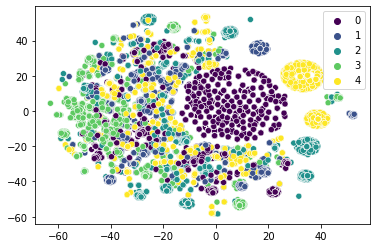

In [129]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = analysisDf[ 'topic_lda_bow_token_frequency' ].tolist(),
    palette = 'viridis')

### TSNE - LDA - Scikit-learn - BoW - Binary

<AxesSubplot:>

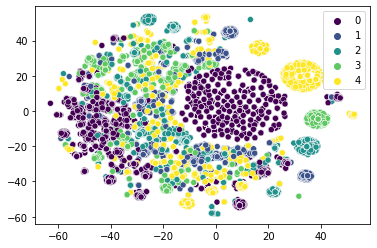

In [130]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = analysisDf[ 'topic_lda_bow_binary' ].tolist(),
    palette = 'viridis')

### TSNE - LDA - Scikit-learn - BoW - TF-IDF

<AxesSubplot:>

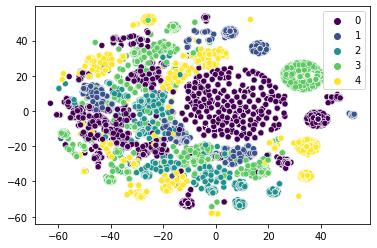

In [131]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = analysisDf[ 'topic_lda_bow_tfidf' ].tolist(),
    palette = 'viridis')

In [127]:
# For time counting
endTime = time.time()
elapsedTime = endTime - startTime
print( f'Running Time: {elapsedTime / 60} minutes' )

Running Time: 32.32180842558543 minutes
